In [3]:
#Exercise - Housing Prices Competition for Kaggle Learn Users

##### To Do

- Load in the train data for the Housing prices Competition.
- Understand the data
- build a model on train data
- make prediction on test
- submit predictions on the kaggle competition.

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load the data

In [5]:
#load in data

df = pd.read_csv('./data/Housing Prices Competition/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Understanding the Data

In [7]:
##print the dataframe
df.shape

(1460, 81)

In [8]:
#print df columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
#quick check of all null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Data Cleaning

In [10]:
for col in df.select_dtypes(include='number'):   # only numeric columns
    thresh = df[col].quantile(0.95)
    df[col] = df[col].clip(upper=thresh)

In [11]:
# # checking to see how many null values we have in each of the other columns
# columns_with_nulls = []
# for column in df.columns:
#     if df.loc[:, column].isnull().any():
#         columns_with_nulls.append(column)

# for column in columns_with_nulls:
#     percent_missing = round(((df.loc[df.loc[:, column].isnull()].shape[0] / df.shape[0]) * 100), 4)
#     print("Column {} has {}% missing values \n".format(column, percent_missing))

#### First iteration thoughts

Some of the columns which contain a very high amount of missing values, like MiscFeature, Fence, PoolQC, Alley and LotFrontage will be dropped. 

-- We can also drop similar or highly correlated columns.

In [12]:
# for columns with only a very small amoung of null values, we will simply drop the nulls that are there.
# columns_with_few_nulls = ['MasVnrType',
#                           'BsmtQual',
#                           'BsmtCond',
#                           'BsmtExposure',
#                           'BsmtFinType1',
#                          'BsmtFinType2',
#                          'Electrical',
#                          'GarageType',
#                          'GarageYrBlt',
#                          'GarageFinish',
#                          'GarageQual',
#                          'GarageCond']
# for column in columns_with_few_nulls:
#     df = df.loc[~df.loc[:, column].isnull()]

In [13]:
# shape after dropping few nulls
df.shape

(1460, 81)

In [14]:
# updating our "columns_with_nulls" list
columns_with_nulls = []
for column in df.columns:
    if df.loc[:, column].isnull().any():
        columns_with_nulls.append(column)
columns_with_nulls

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [15]:
percent_columns_with_nulls = (len(columns_with_nulls) / len(df.columns)) * 100
print("Percentage of columns still containing missing values: {}".format(percent_columns_with_nulls))

Percentage of columns still containing missing values: 23.456790123456788


#### Data Visualization

In [16]:
def plot_boxplot(df, column_name):
    """
    Plots a box plot for a specific column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to plot.

    Returns:
    None
    """
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.xlabel(column_name)
    plt.grid(True)
    plt.show()

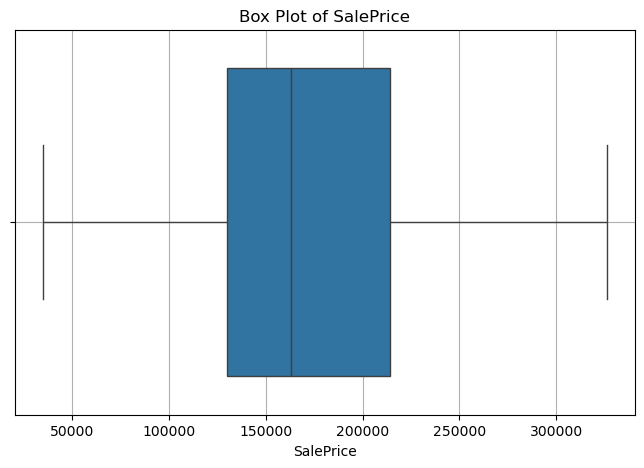

In [17]:
#checking for negatives and outliers
plot_boxplot(df,'SalePrice')

### Train-Test Split
To prevent data leakage, we will do our train/test split now, to hold out one part of the dataset completely away as the holdout set.

In [18]:
df = df.drop(columns=columns_with_nulls)

#drop the Id column
df = df.drop(['Id','Utilities'],axis=1)

df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [19]:
# splitting data into features and targets 
x = df.drop(columns=['SalePrice','Condition2','Street'])
y = df.loc[:, 'SalePrice']

##### remove the following cols from the x_train and x_test
remove_cols = ['BsmtFinSF1',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'BsmtFullBath',
 '2ndFlrSF',
 'EnclosedPorch',
 '3SsnPorch']
x = x.drop(remove_cols,axis=1)

# Removing 15% of data as holdout
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

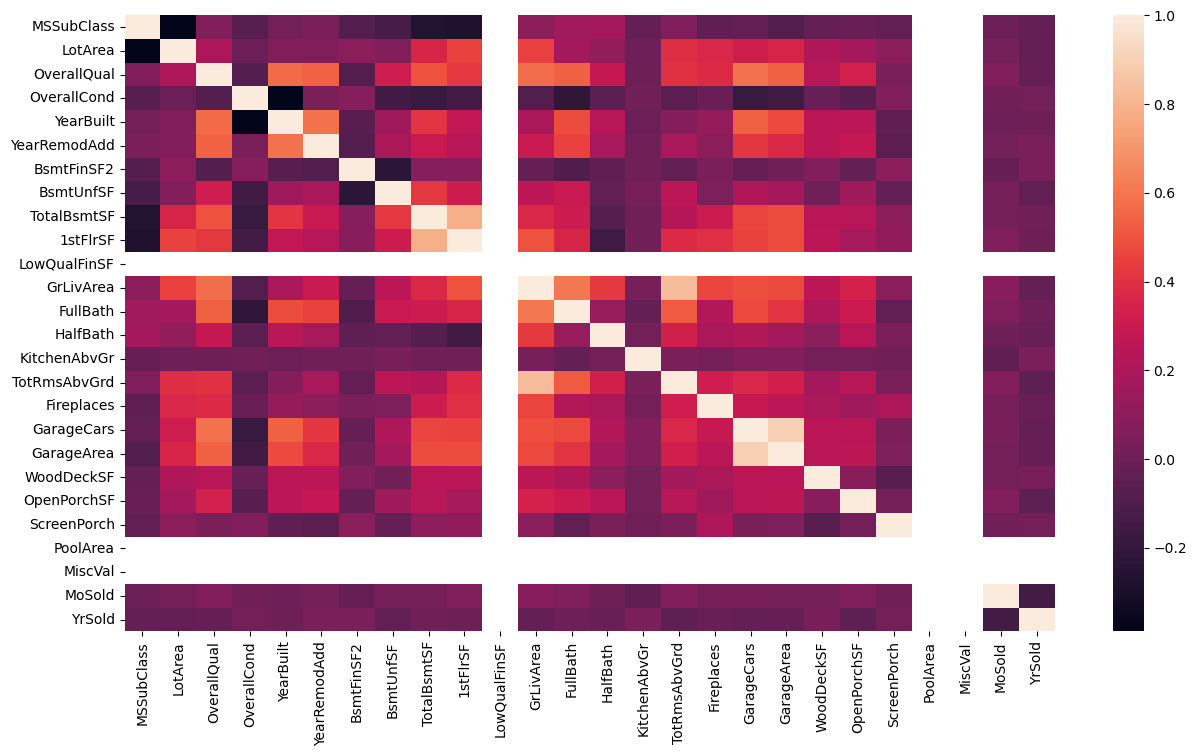

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(x_train.select_dtypes(include=["number"]).corr())


plt.show()

In [21]:
x_train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
#remove highly correlated columns

#'GarageYrBlt'

high_corr = ['1stFlrSF','YearRemodAdd','MoSold','ScreenPorch','OpenPorchSF','HalfBath']

x_train = x_train.drop(high_corr,axis=1)

In [23]:
x_train.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,PoolArea,MiscVal,YrSold,SaleType,SaleCondition
254,20,RL,8400.0,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,...,0,1,294.0,Y,250,0,0,2010,WD,Normal
1066,60,RL,7837.0,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,1,2,380.0,Y,0,0,0,2009,WD,Normal
638,30,RL,8777.0,Reg,Lvl,Inside,Gtl,Edwards,Feedr,1Fam,...,0,0,0.0,P,328,0,0,2008,WD,Normal
799,50,RL,7200.0,Reg,Lvl,Corner,Gtl,SWISU,Feedr,1Fam,...,2,1,240.0,Y,0,0,0,2007,WD,Normal
380,50,RL,5000.0,Reg,Lvl,Inside,Gtl,SWISU,Norm,1Fam,...,1,1,308.0,Y,0,0,0,2010,WD,Normal


### Feature Engineering

In [24]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [name for name in x_train.columns if x_train[name].nunique() < 3 and x_train[name].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in x_train.columns if x_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols

x_train = x_train[my_cols].copy()
x_test = x_test[my_cols].copy()

print('My dataframe now has {} columns.'.format(len(my_cols)))

My dataframe now has 21 columns.


In [25]:
print(my_cols)

['CentralAir', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'YrSold']


#### Define Pipelines for Preprocessing

In [26]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

In [27]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_cols),
        ('categorical', categorical_transformer, categorical_cols)
    ])

## ML Model

### Linear Regression

In [28]:
x_train.columns

Index(['CentralAir', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal',
       'YrSold'],
      dtype='object')

In [29]:
#baseline model
lr_model = LinearRegression()


lr_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', lr_model)
                             ])


# Preprocessing of training data, fit model 
lr_pipe.fit(x_train, y_train)

# Preprocessing of test data, get predictions
preds = lr_pipe.predict(x_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)
print('MAE for Linear Regression', score)

MAE for Linear Regression 17437.95396943087


#### Random Forest

In [30]:
rf_model = RandomForestRegressor(n_estimators=1000,max_depth = 6,random_state=42)

#use best hyper-parameters
#'max_depth': 6, 'n_estimators': 1000


rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)
                             ])


# Preprocessing of training data, fit model 
rf_pipe.fit(x_train, y_train)

# Preprocessing of test data, get predictions
preds = rf_pipe.predict(x_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)
print('MAE for Random Forest for test', score)

MAE for Random Forest for test 16806.800857701714


In [31]:
#compare to train accuracy
# Evaluate the model
tr_score = mean_absolute_error(y_train, rf_pipe.predict(x_train))
print('MAE for Random Forest for test', tr_score)

MAE for Random Forest for test 13124.409109840784


In [32]:
#model could be overfitting! -- model now better.

#### Cross Validate

In [33]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(rf_pipe, x, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores for the Random Forest", scores)

MAE scores for the Random Forest [18600.23249948 16954.62971551 17085.82083361 16620.56594702
 17439.12930948]


##### In my Second Iteration

- deal with outliers
- check my feature importance
- remove unneccesary columns
- iterate over model hyperparameters
- deal with utilities column

##### Print Feature Importance

In [34]:
feat_imp = pd.DataFrame()

feat_imp['column_names'] = x_train.columns
feat_imp['feature_importance'] = np.round(rf_pipe.steps[1][1].feature_importances_,3)

feat_imp = feat_imp.sort_values(by=['feature_importance'],ascending=False,ignore_index=True)
feat_imp

,column_names,feature_importance
0,LotArea,0.661
1,LowQualFinSF,0.133
2,BsmtUnfSF,0.061
3,GarageCars,0.028
4,Fireplaces,0.028
5,OverallCond,0.022
6,MSSubClass,0.021
7,BsmtFinSF2,0.009
8,TotRmsAbvGrd,0.008
9,OverallQual,0.008


In [35]:
feat_imp.iloc[20:27,0].to_list()

['PoolArea']

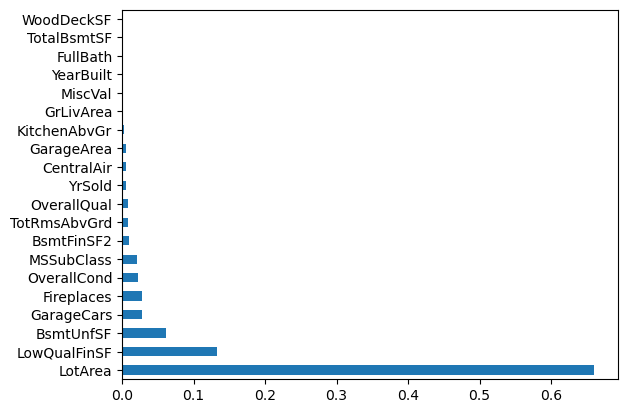

In [36]:
feat_importances = pd.Series(rf_pipe.steps[1][1].feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#### Cross Validation + Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'model__n_estimators': [100, 500, 1000],
    'model__max_depth': [2, 4, 5,6]
}

clf = GridSearchCV(rf_pipe, params, cv=5, return_train_score=True,error_score='raise')
clf.fit(x_train,y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [2, 4, ...], 'model__n_estimators': [100, 500, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,'raise'
,return_train_score,True
,transformers,"[('numerical', ...), ('categorical', ...)]"


In [38]:
res = clf.cv_results_
print(res.keys())

res = pd.DataFrame(res)

cols = [r for r in res.columns if ('score' in r and 'mean' in r)]

print(np.max(res.loc[:, 'mean_test_score']))
res.loc[:, cols]

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model__max_depth', 'param_model__n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])
0.8550213667533132


,mean_score_time,mean_test_score,mean_train_score
0,0.002516,0.687201,0.702134
1,0.007785,0.687961,0.703027
2,0.014031,0.687436,0.702395
3,0.002968,0.816455,0.859287
4,0.009429,0.816524,0.860705
5,0.022451,0.816641,0.860642
6,0.004545,0.840450,0.900804
7,0.016131,0.841420,0.902099
8,0.029268,0.841485,0.902188
9,0.004806,0.853577,0.931311


#### Iteration 3

In [39]:
### remove the ideas that reduce my data count --  using only simple imputer
### get the best hyper-parameters from grid search

In [40]:
best_hyperparams = {k.split("__")[1]: v for k, v in clf.best_params_.items()}
print(best_hyperparams)

{'max_depth': 6, 'n_estimators': 1000}
